Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



[1] "execution is done"
[1] "execution is done"



  These packages will be installed:

  'svglite'

  It may take some time.

also installing the dependency ‘systemfonts’




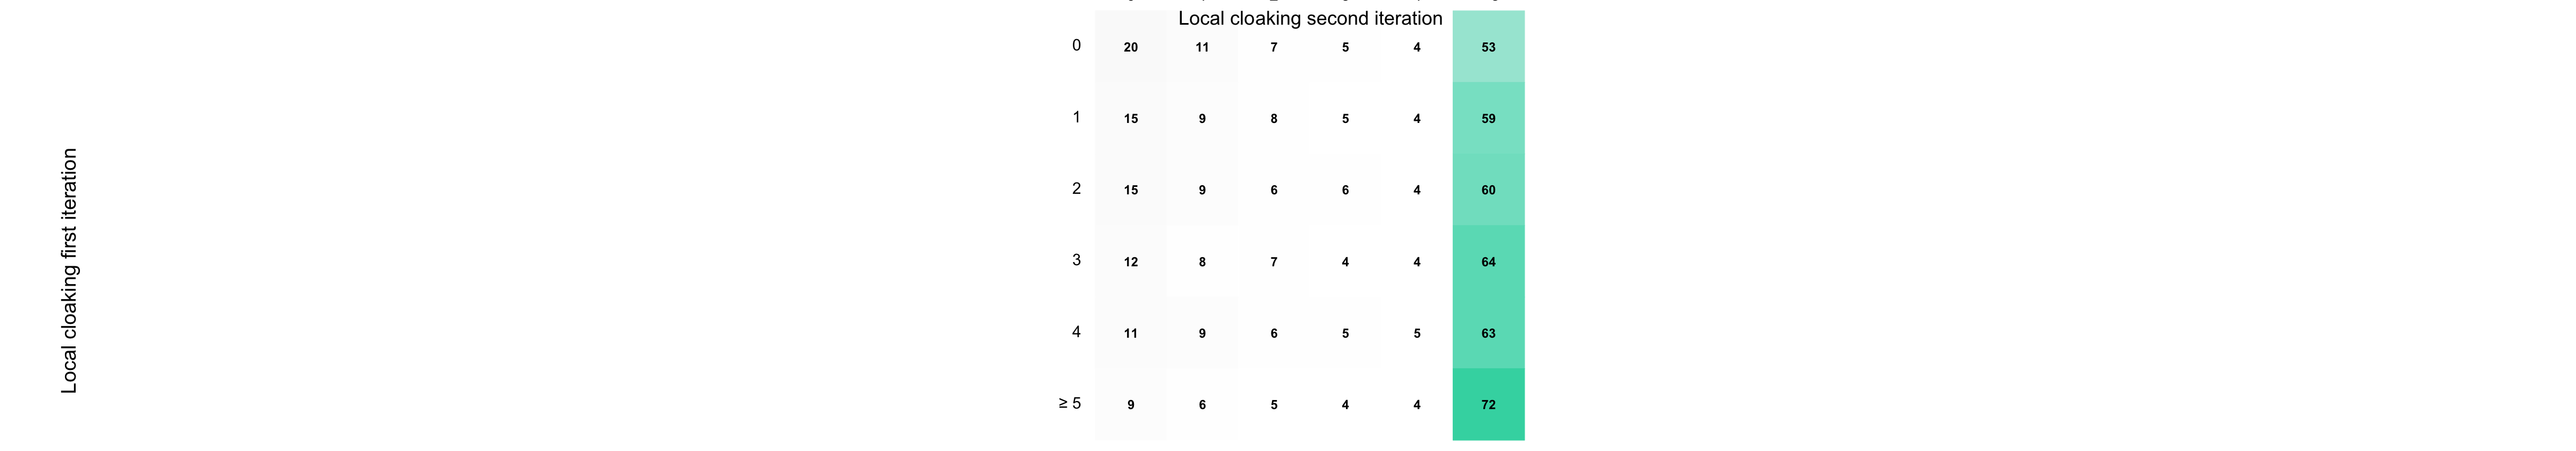

In [39]:
t1 <- Sys.time()
source('messageAB_AIDS.R')
source('messageAB_WBCD.R')

librarian::shelf(cowplot, 
                svglite)


## AIDS dataset: Survival curves and protection metrics

On this section, we present the R code to display the figure XXXXXX of the article [lien_papier].

The methodology was inspired by the following article:

Scott, M. (1996). A Trial Comparing Nucleoside Monotherapy with Combination Therapy in HIV-Infected Adults with CD4 Cell Counts from 200 to 500 per Cubic Millimeter. The NEW ENGLAND JOURNAL of MEDICINE, 335(15), p. 1081-1090. doi: 10.1056/NEJM199610103351501

We used the avatarized dataset with the parameter k= 20.

We performed 3 analyses:

    1 - An FAMD (Factor Analysis for Mixed Data) projection of an Avatar on the two first components of FAMD built on the Original dataset to observe the structural similarities.
    2 - Survival curves comparison between Avatar and Original datasets.
    3 - Protection level computation (local cloaking and hidden rate).



### Projection comparison


We are here printing the mutlidimensionnal projection on the two first components of the FAMD (Factorial analysis of mixed data).

Individuals are colored by data sources : ORIGINAL in white or AVATARS in green.

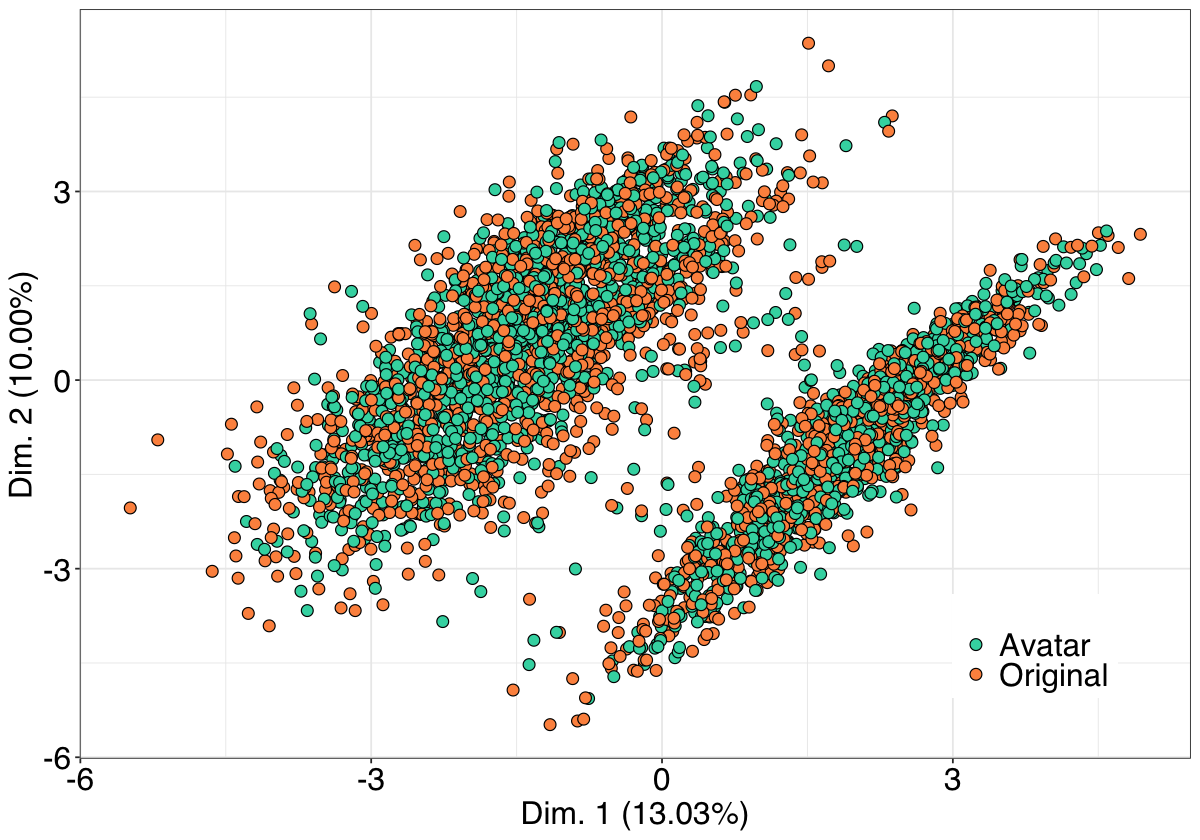

In [2]:
plotAa

### Figure survival curve analysis 

We compared treatments' efficacy betwween arms 0 and arms 1 for Original and Avatar datasets.

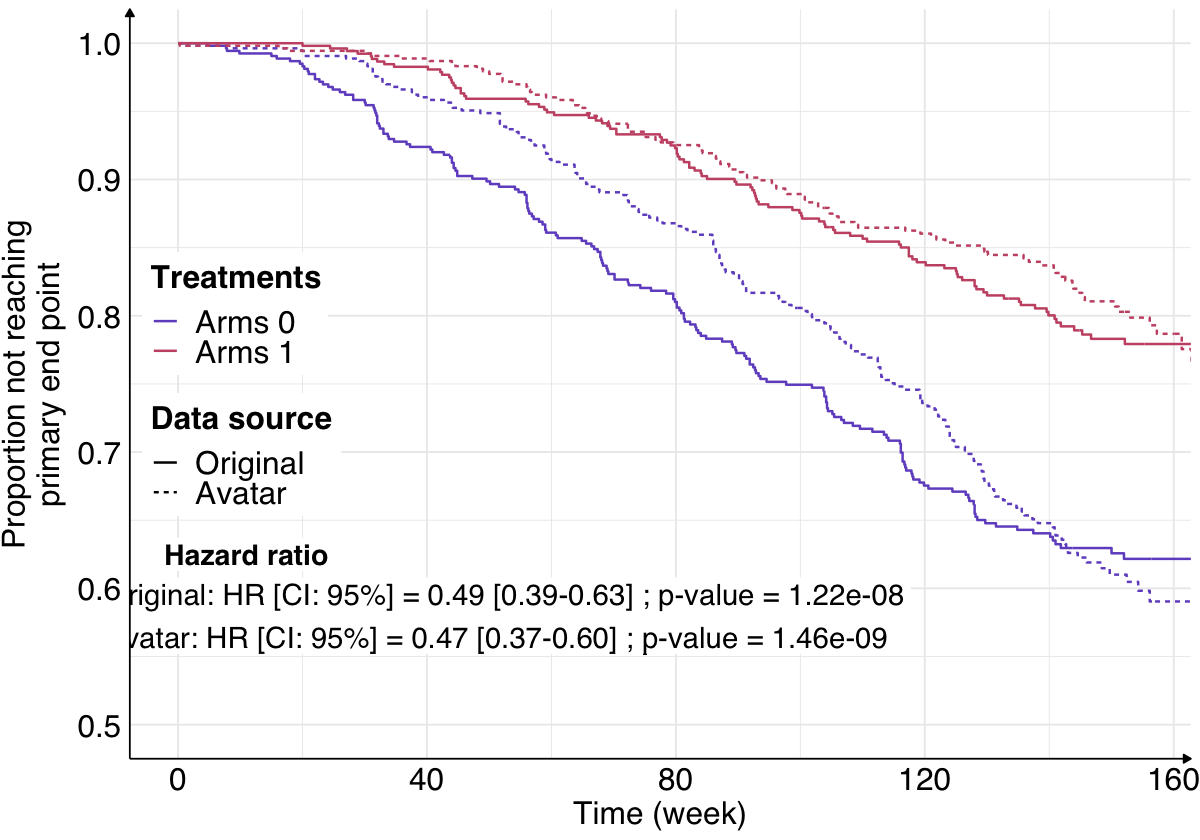

In [3]:
plotAc

### Supplemental graph

As a supplemental graph we presented the survival curves for all treatments.

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


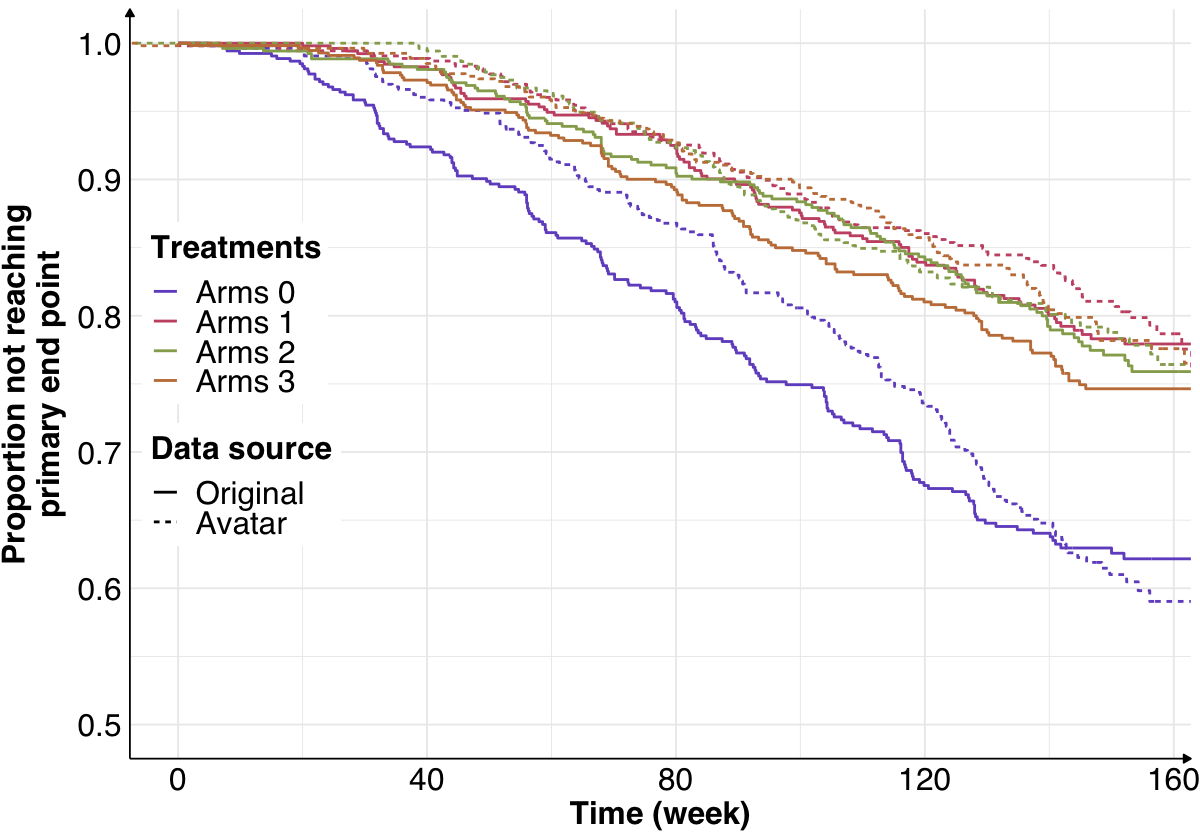

In [4]:
ggsurv

### Supplemental : Hazard ratio comparison 

Hazard ratio are computed: this table presents hazard ratio with arms 0 as reference. P-value and 95% confidence intervals are shown.

In [5]:
res_concat

Hazard Ratio 95% Confidence Interval p-value 
Original arms 1 0.49         0.39-0.63               9.19e-09
Avatar arms 1   0.47         0.37-0.60               1.94e-09
Original arms 2 0.52         0.41-0.67               1.07e-07
Avatar arms 2   0.51         0.40-0.65               6.43e-08
Original arms 3 0.59         0.47-0.73               3.68e-06
Avatar arms 3   0.49         0.38-0.62               9.58e-09

# WBCD dataset: Multidimensional reduction comparison between Original and Avatar data and protection metrics evaluation

We display figures 2b, 3b and 3d  of the article [lien_papier] related to the WBCD dataset.
The Avatar selected to be compared to the original dataset is the one built on the parameter k = 20.

Two properties of the Avatar method are examined: 
- 1. Structural similarity observed with an FAMD (Factor Analysis for Mixed Data) projection of an Avatar on the two first components of FAMD of the Original dataset. 
- 2. Protection level with the computation of local cloaking and hidden rate metrics.

Code regarding feature selection and cancer diagnosis prediction is shown on the Python notebook `messageA_WBCD_python.ipynb`. The F-score and AUROC comparison are presented there.

## FAMD projection


We are here printing the mutlidimensionnal projection on the two first components of the FAMD (Factor analysis for mixed data).

Individuals are colored by data sources. The original ones are in orange and the avatars in green.

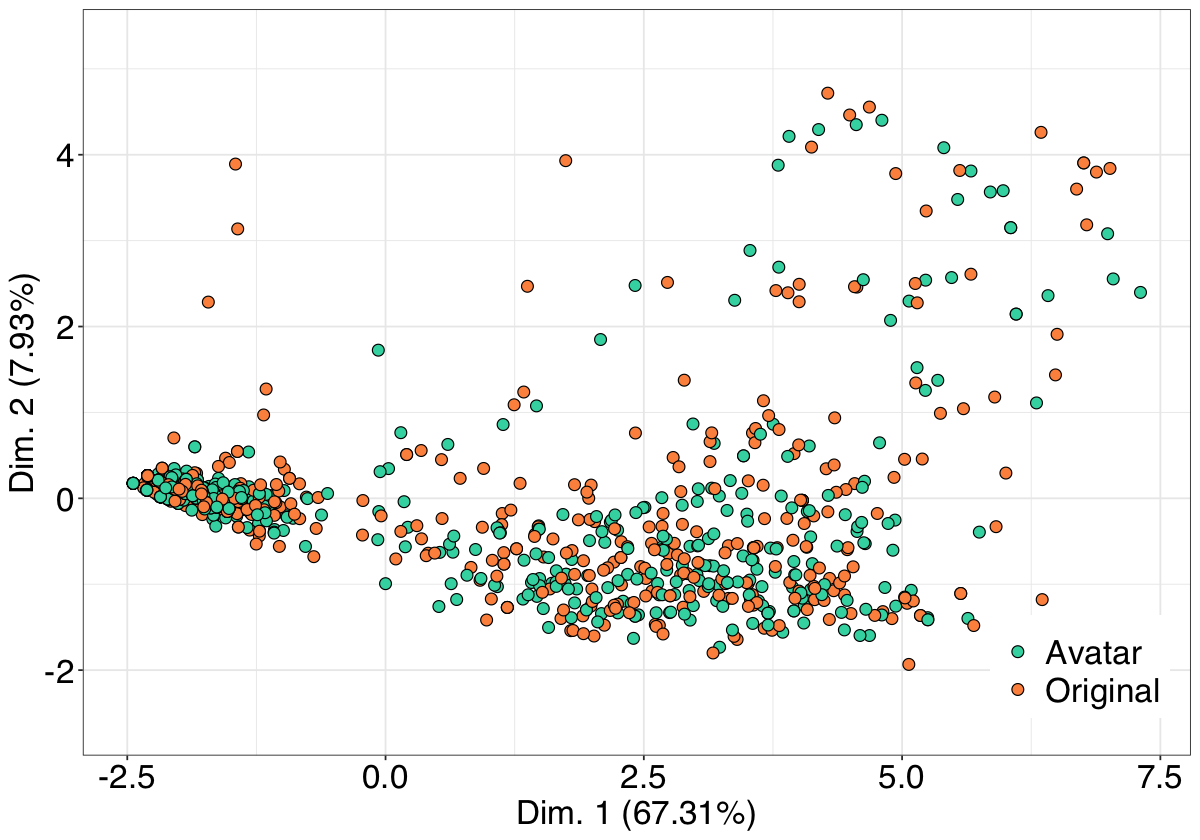

In [15]:
plotAb


## Graphes F-scores

We performed the F-score figure, with confidence intervals of the mean (95%).

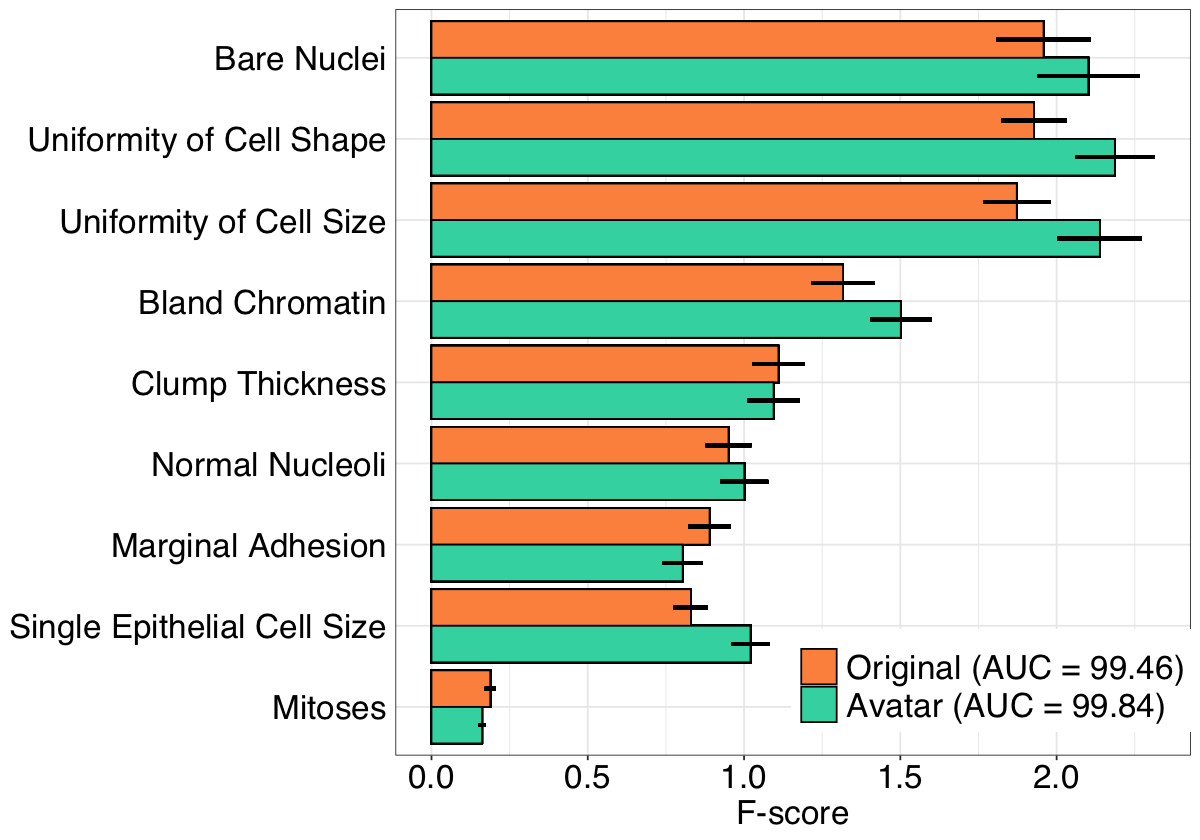

In [16]:
plotAd

## Panel A visualization

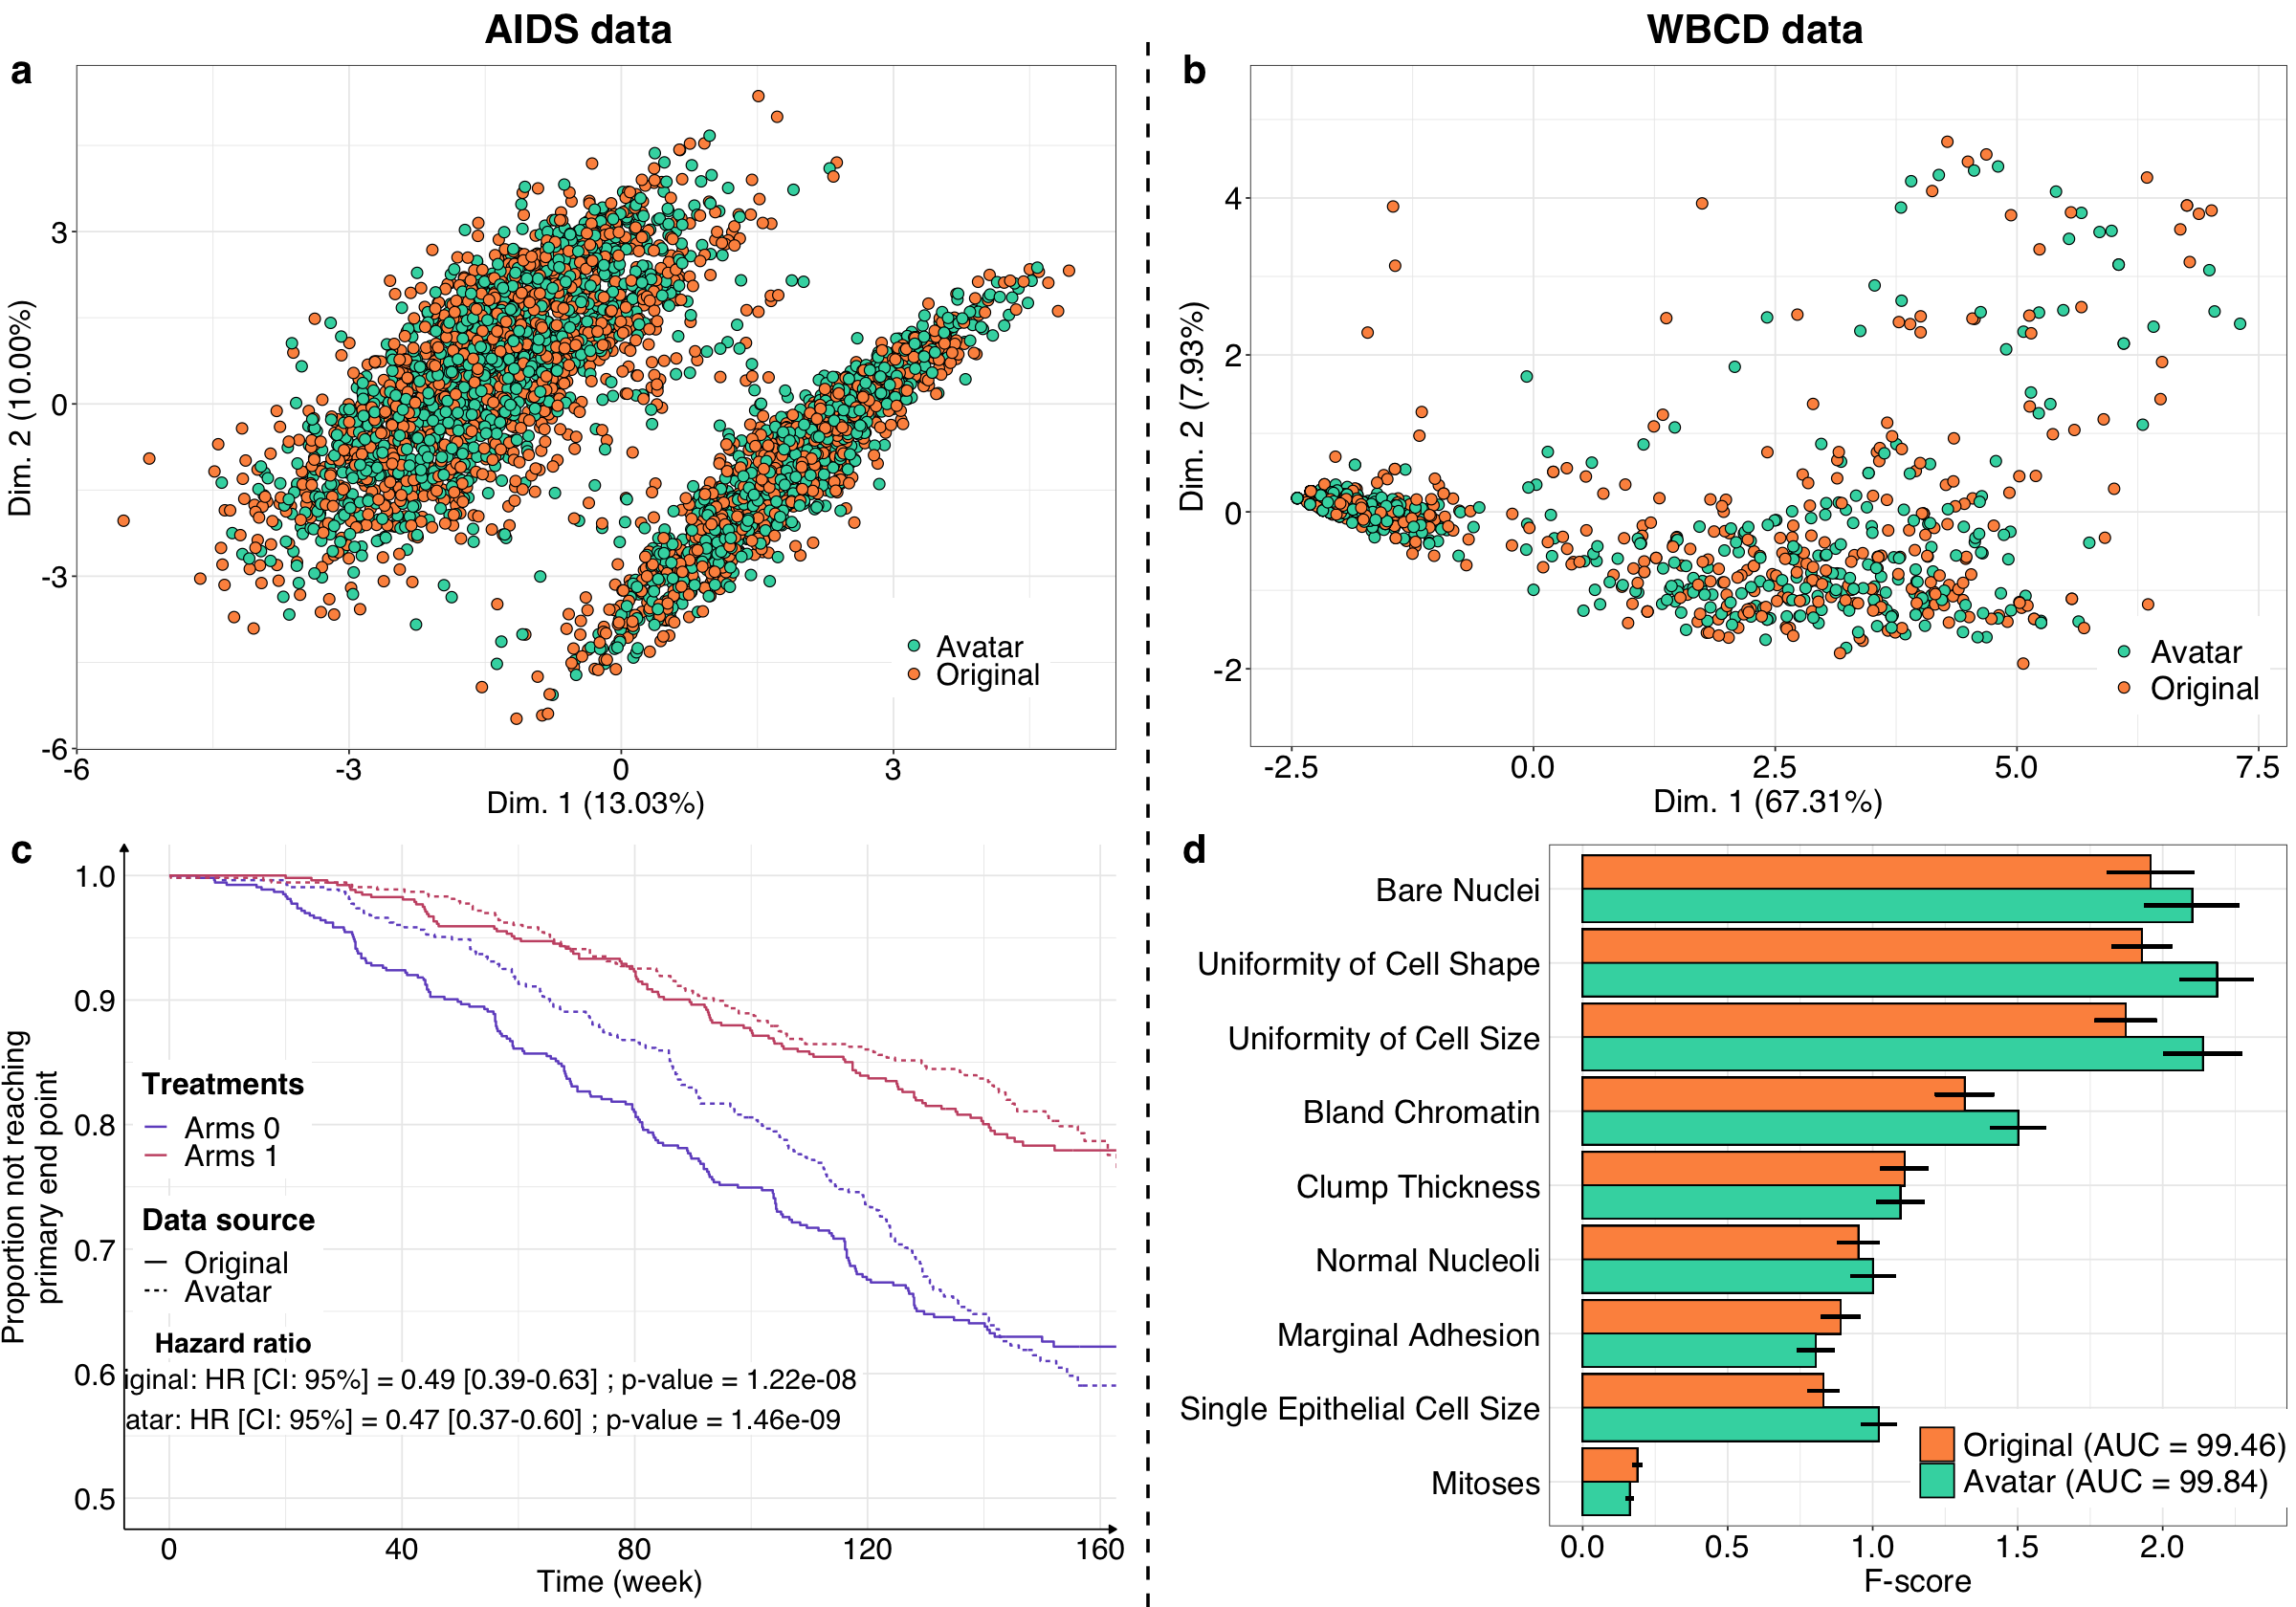

In [22]:
options(repr.plot.width = 20, repr.plot.height = 14)
panelA <- ggdraw() +
    draw_plot(plotAa, x = 0, y = 0.485, width = 0.49, height = 0.48) +
    draw_plot(plotAb, x = 0.51, y = 0.485, width = 0.49, height = 0.48) +
    draw_plot(plotAc, x = 0, y = 0, width = 0.49, height = 0.48) +
    draw_plot(plotAd, x = 0.51, y = 0, width = 0.49, height = 0.48) +
    draw_plot_label(label = c("a", "b", "c", "d", "AIDS data", "WBCD data"), size = 25, family = "sans",
                    x = c(0, 0.51, 0, 0.51, 0.17, 0.67), y = c(0.975, 0.975, 0.49, 0.49, 1, 1)) +
    draw_line(x = c(0.5, 0.5), y = c(0, 0.98), color = "black", size = 1, lty = 2)
panelA

#ggsave2(file="../../figure/panelA.svg", plot = ggplot2::last_plot(), width = 20, height = 14, dpi = 320)

## Protection level: metrics   

This section provides the computation of protection metrics (local cloaking and hidden rate).


### AIDS - Distribution of local cloaking

Warning message:
“Removed 230 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 230 rows containing non-finite values (stat_density).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


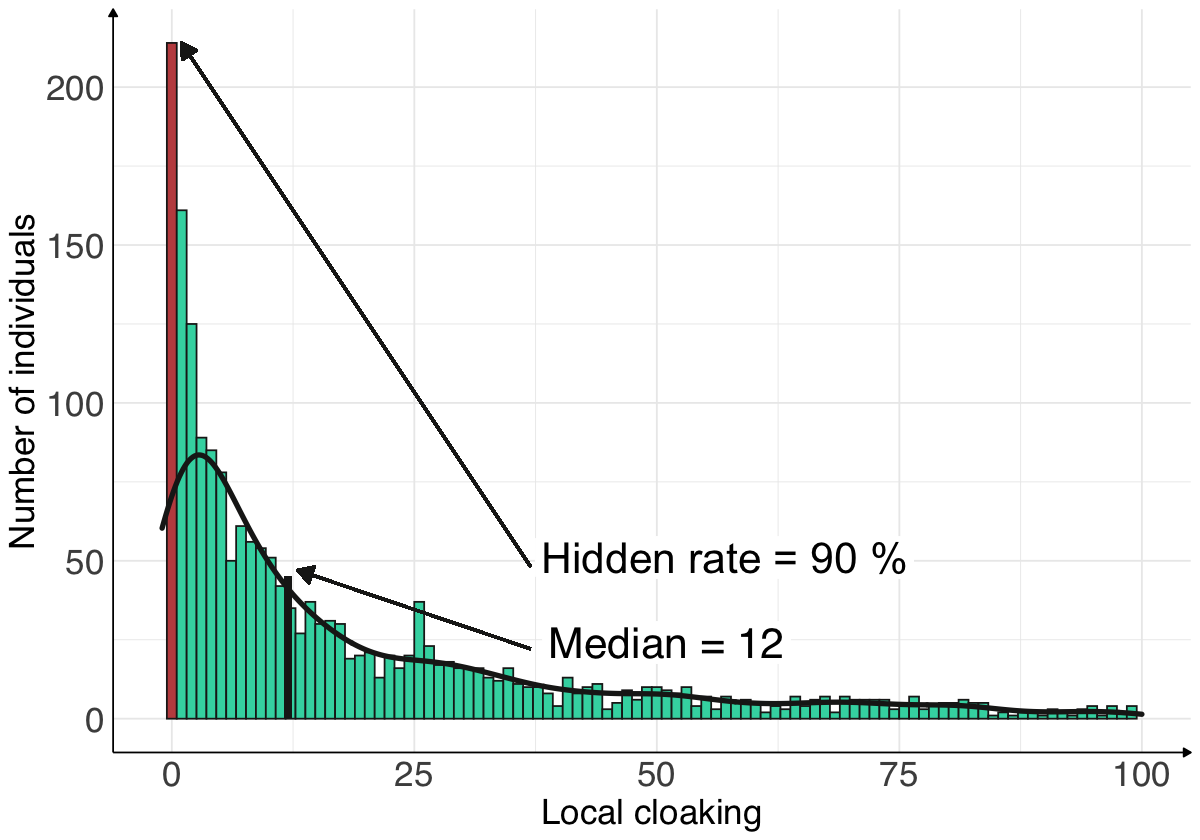

In [26]:
plotBa

### AIDS - Zero cloaking over 25 avatarizations

Here, we performed 25 different avatarizations with the same parameters **(`k = 20, nf = 5`)**.  
Then, we looked at the number of time, each individual generates an avatar with a local cloaking of 0.

We printed the distribution and the number of individuals according to the number of zero local cloaking.

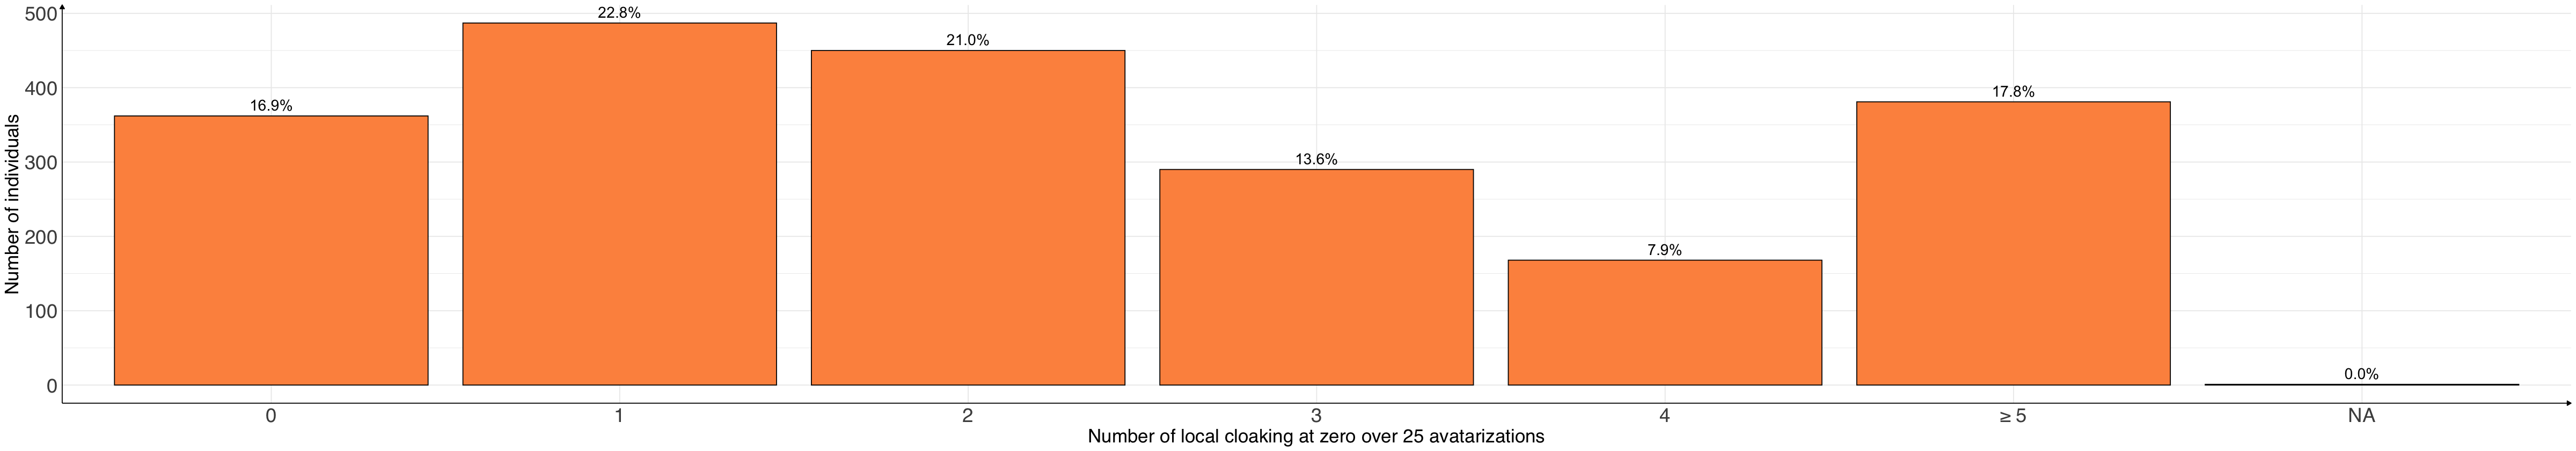

In [33]:
plotBc

## AIDS - Supplemental analysis: P(X=0)

We also computed the probability of getting a local cloaking at  `c(0, 1, 2, 3, 4, 5 and more)`.

In [34]:
freq_local_cloaking

Local cloaking Probability (%)
1 0              10.81          
2 1              7.23           
3 2              5.56           
4 3              4.58           
5 4              3.90           
6 >= 5           67.92

### AIDS - Supplemental analysis: P(X2 = x | X1 = y) 

We looked at the conditionnal probability of getting a local cloaking of 0, 1, 2, 3, 4, or morethan 5 ; knowing that we get 0 at a previous local cloaking.

In [35]:
corplot

ERROR: Error in eval(expr, envir, enclos): object 'corplot' not found


### WBCD - Protection level: metrics   

This section provides the computation of protection metrics: local cloaking and hidden rate.

### Local cloaking distribution figure

We first compute metrics, which need the security metrics specifics functions.   
Then, we displayed the distribution of the local cloaking.

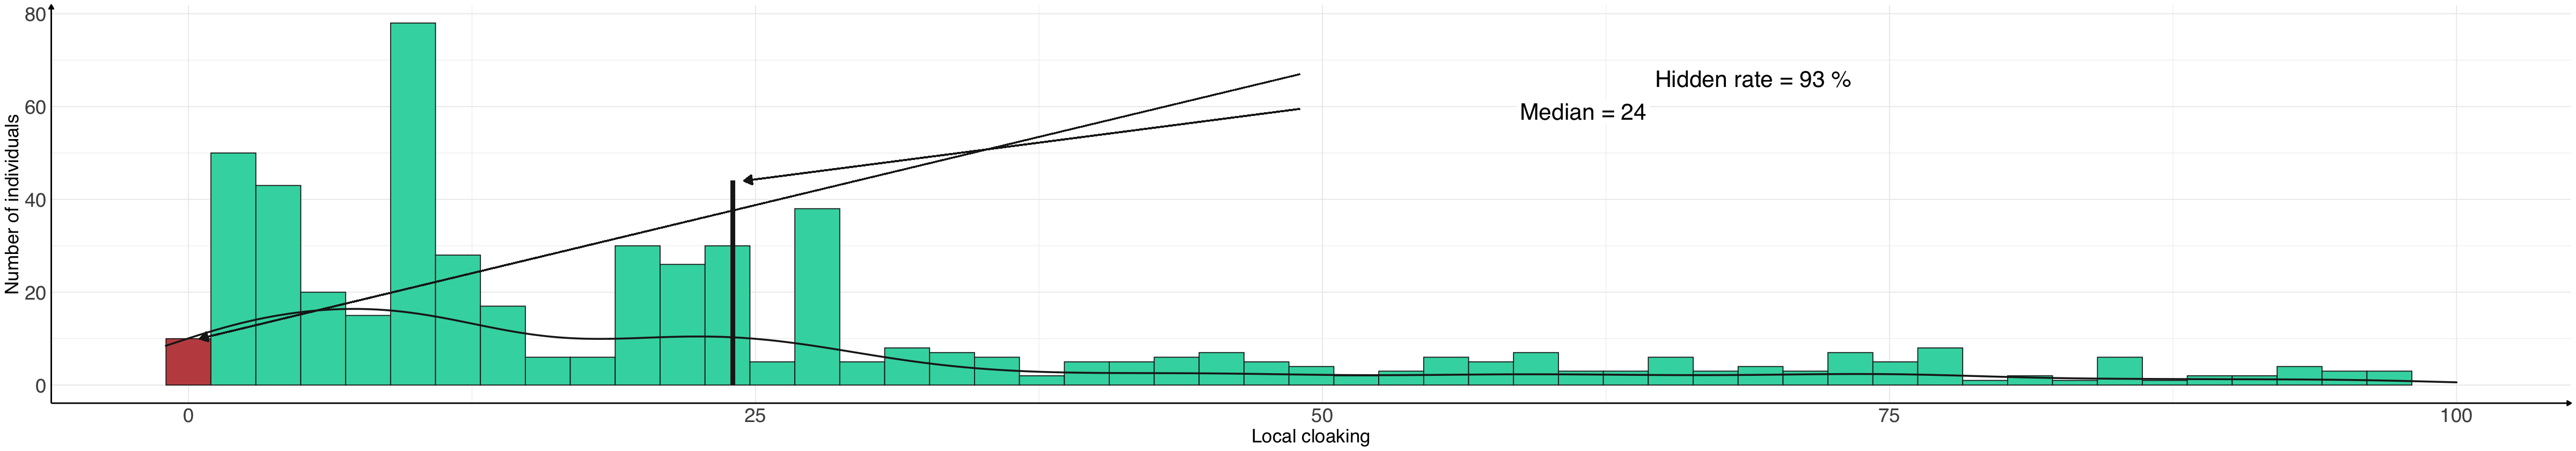

In [36]:
plotBb

### WBCD - Zero cloaking over 25 avatarizations

To test the protection level of the Avatar method, we computed 25 avatars with k = 20 and looked at the number time that local clocking is equal to 0.

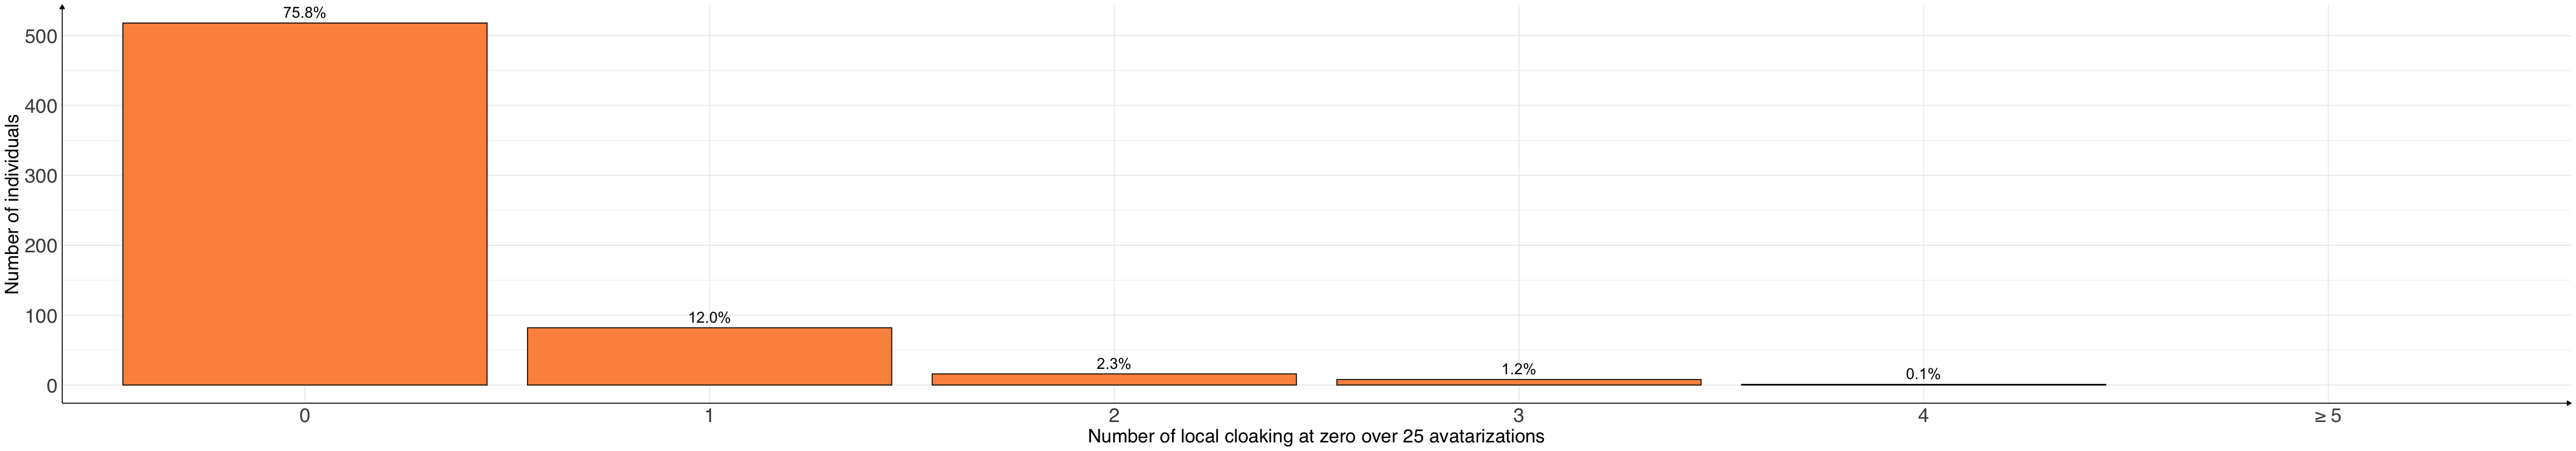

In [37]:
plotBd

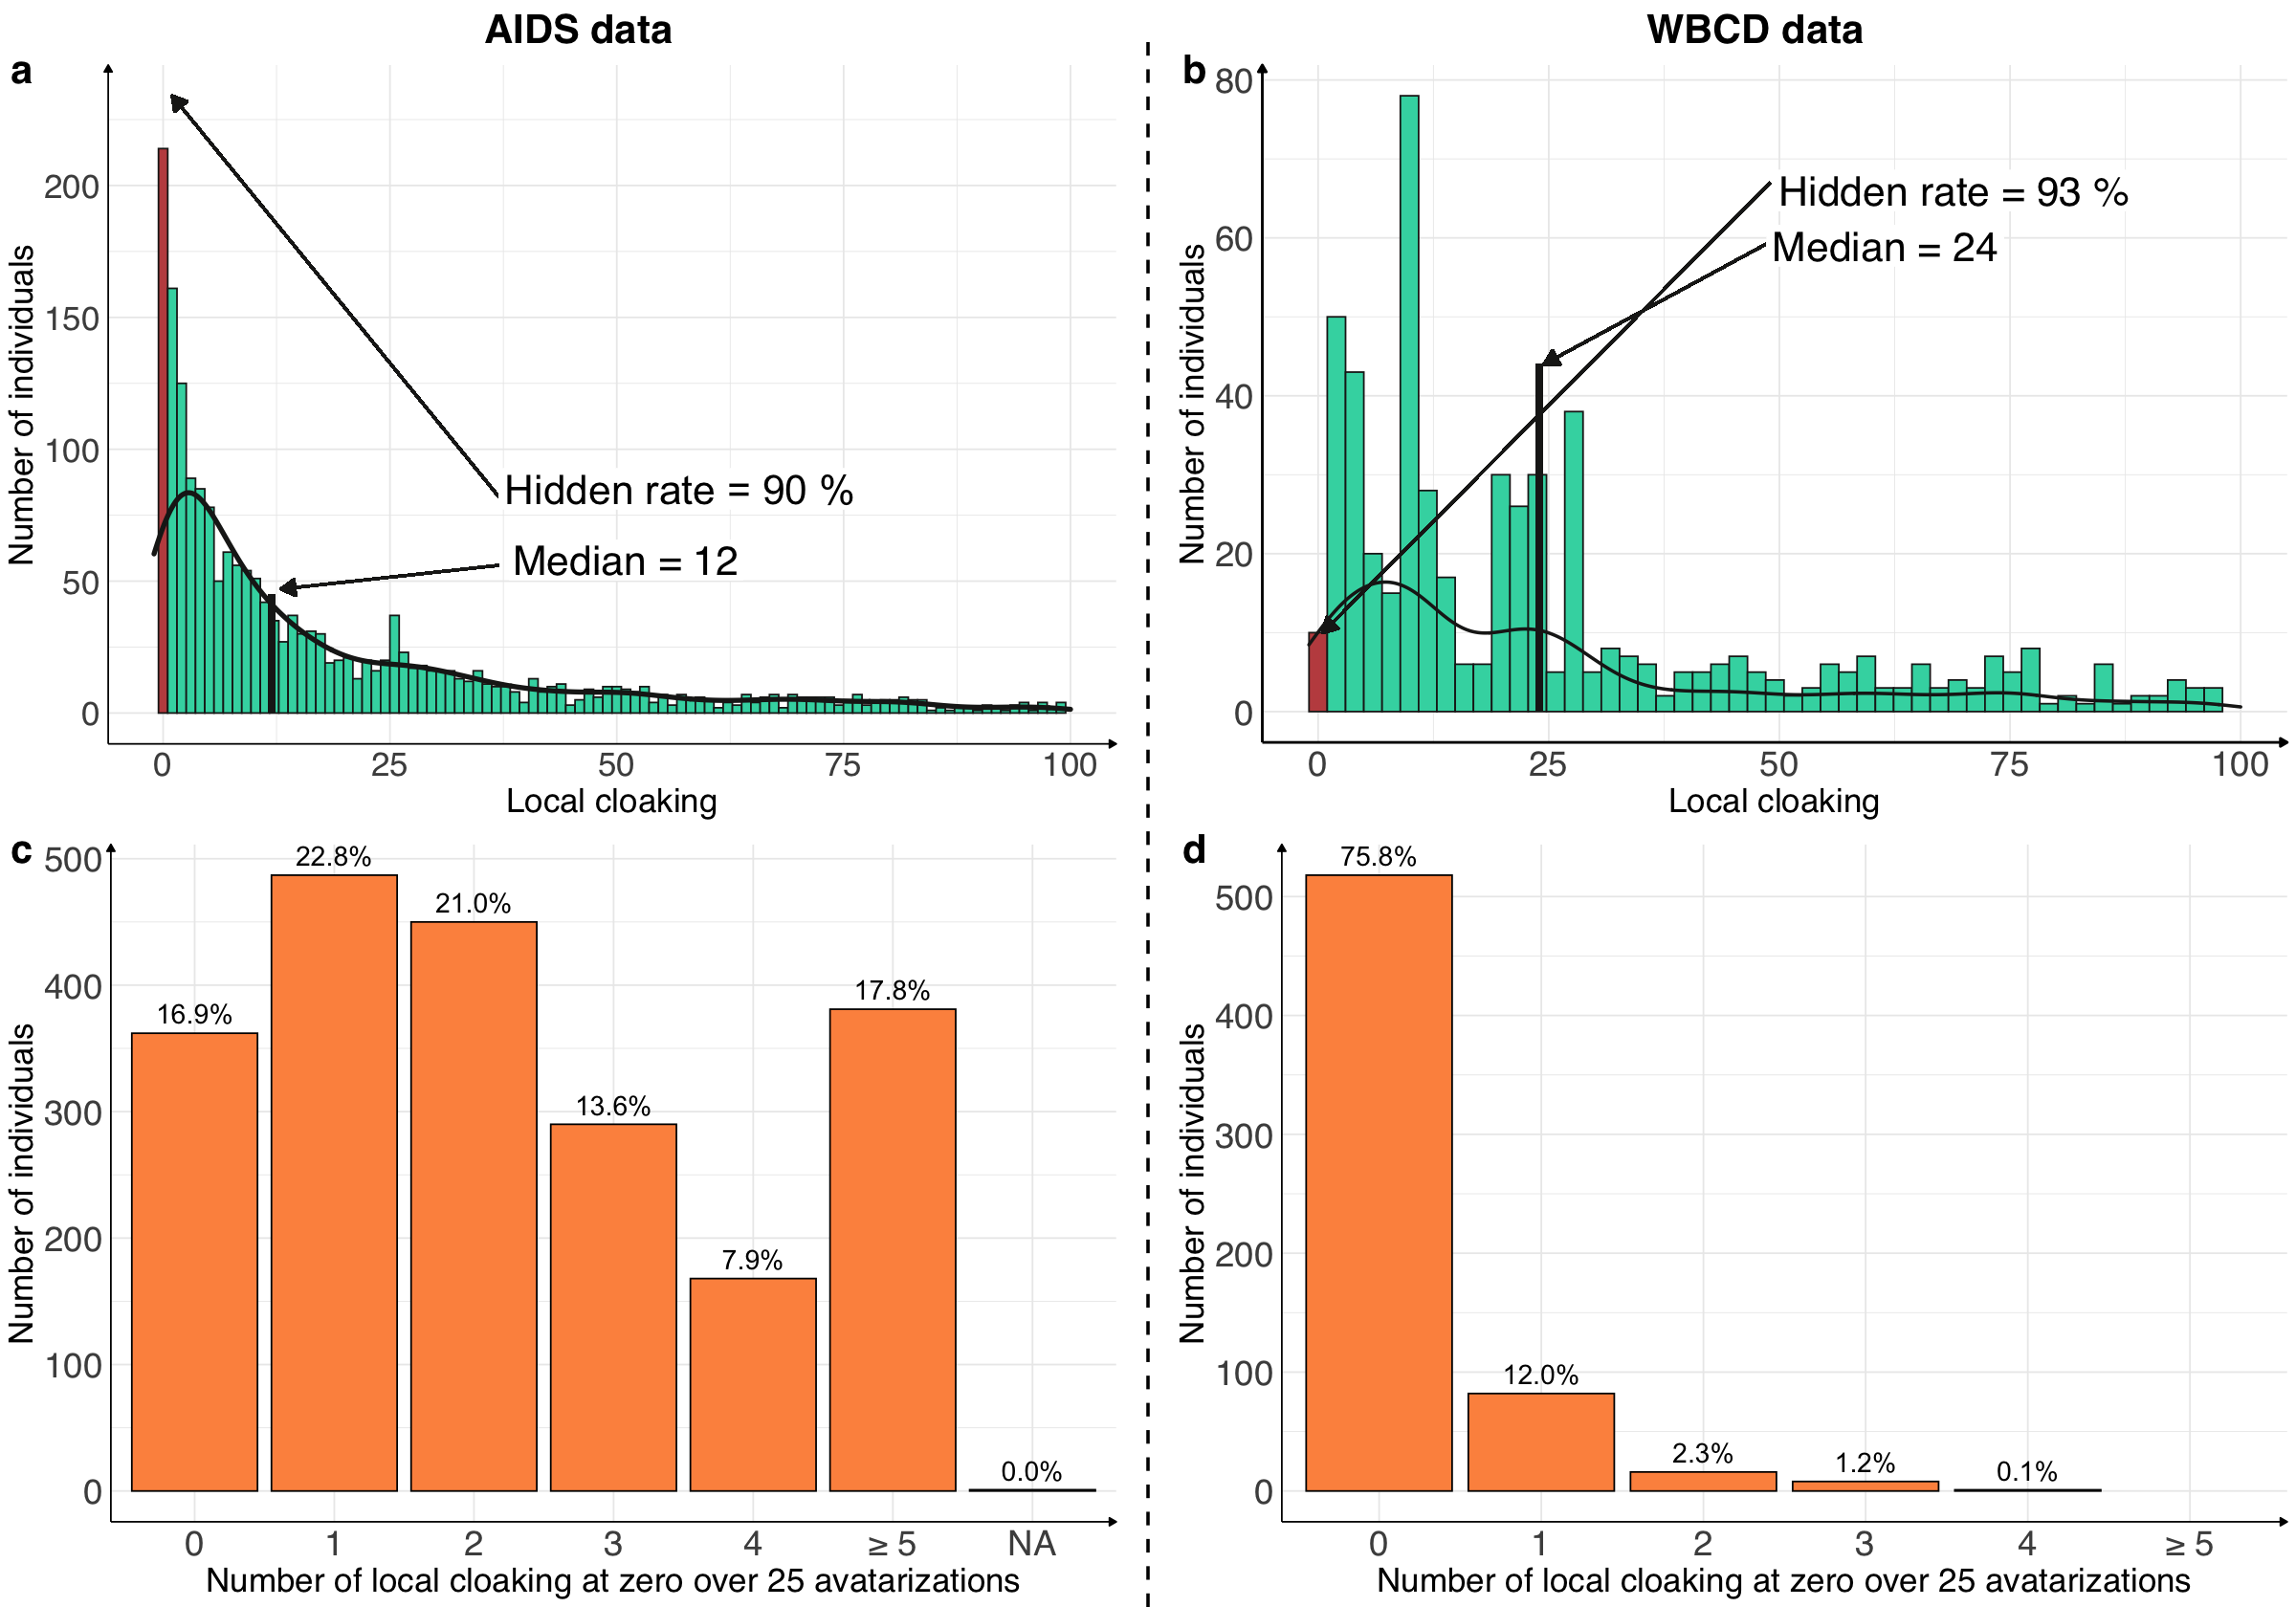

In [38]:
options(repr.plot.width = 20, repr.plot.height = 14)
panelB <- ggdraw() +
    draw_plot(plotBa, x = 0, y = 0.485, width = 0.49, height = 0.48) +
    draw_plot(plotBb, x = 0.51, y = 0.485, width = 0.49, height = 0.48) +
    draw_plot(plotBc, x = 0, y = 0, width = 0.49, height = 0.48) +
    draw_plot(plotBd, x = 0.51, y = 0, width = 0.49, height = 0.48) +
    draw_plot_label(label = c("a", "b", "c", "d", "AIDS data", "WBCD data"), size = 25, family = "sans",
                    x = c(0, 0.51, 0, 0.51, 0.17, 0.67), y = c(0.975, 0.975, 0.49, 0.49, 1, 1)) +
    draw_line(x = c(0.5, 0.5), y = c(0, 0.98), color = "black", size = 1, lty = 2)
panelB

#ggsave2(file="../../figure/panelB.svg", plot = ggplot2::last_plot(), width = 20, height = 14, dpi = 320)

In [10]:
source('messageC_AIDS.R')
source('messageC_WBCD_R.R')


  These packages will be installed:

  'svglite'

  It may take some time.

also installing the dependency ‘systemfonts’


Warning message in stock(..., lib = lib, update_all = update_all, quiet = quiet, :
“
  These packages failed to install:

  'svglite'

  Check the spelling and capitalisation of the names.

  Are they Bioconductor packages? If so, please install Bioconductor
  (BiocManager and BiocBase).

  Are they from GitHub? If so, please supply both the GitHub
  username and package name, e.g. DesiQuintans/librarian”
Warning message in librarian::shelf(reticulate, FactoMineR, survival, survminer, :
“
  These packages are not installed, so they were not attached:

  'svglite'

  Did they fail to install? Are they spelled correctly?”
Warning message:
“Number of logged events: 51”
Warning message:
“Number of logged events: 3”
Warning message:
“Number of logged events: 3”
Warning message in sqrt(nombre):
“NaNs produced”
Warning message:
“Setting row names on a tibble is deprecate

[1] "execution is done"


ERROR: Error in element_text(size = axis_text_size_small, colour = "black", family = "sans"): object 'axis_text_size_small' not found


# AIDS dataset: Impact of the *k* parameter

On this notebook, we present the R code to display the figure XXXXXX of the article [lien_papier].

We focus our analysis on the impact of the parameter *k* in the statistical conservation and the security level of the dataset.

We performed 3 analyses:
    
    1 - An FAMD (Factor Analysis for Mixed Data) projection of two Avatar datasets (high k versus low k) on the two first components of FAMD built on the Original dataset to observe the structural similarities
    2 - Evolution of the hazard ratio accross k
    3 - Protection level computation (local cloaking) for different k values.

## Projection comparison small *k* versus high *k* 

We performed 2 FAMD, small *k* value (i.e. 1/10% of the total number of individuals) and high *k* value (i.e. 40/50% of the total number of individuals).

In [ ]:
plotCa

## Relative hazard ratio accross  *k* 

We compute relative hazard ratio according the parameter *k*.

### Hazard ratio with Original data 

To compare, we first compute hazard ratio for original data

In [13]:
table2_data

0        1          2          3         
N                       532      522        524        561       
Event                   181 (34) 103 (19.7) 109 (20.8) 128 (22.8)
Hazard ratio            ref      0.49       0.52       0.59      
95% confidence interval NA       0.39-0.63  0.41-0.67  0.47-0.73 
p-value                 NA       <0.001     <0.001     <0.001

### Avatar graphical representations

Warning message:
“Removed 156 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 156 rows containing non-finite values (stat_smooth).”


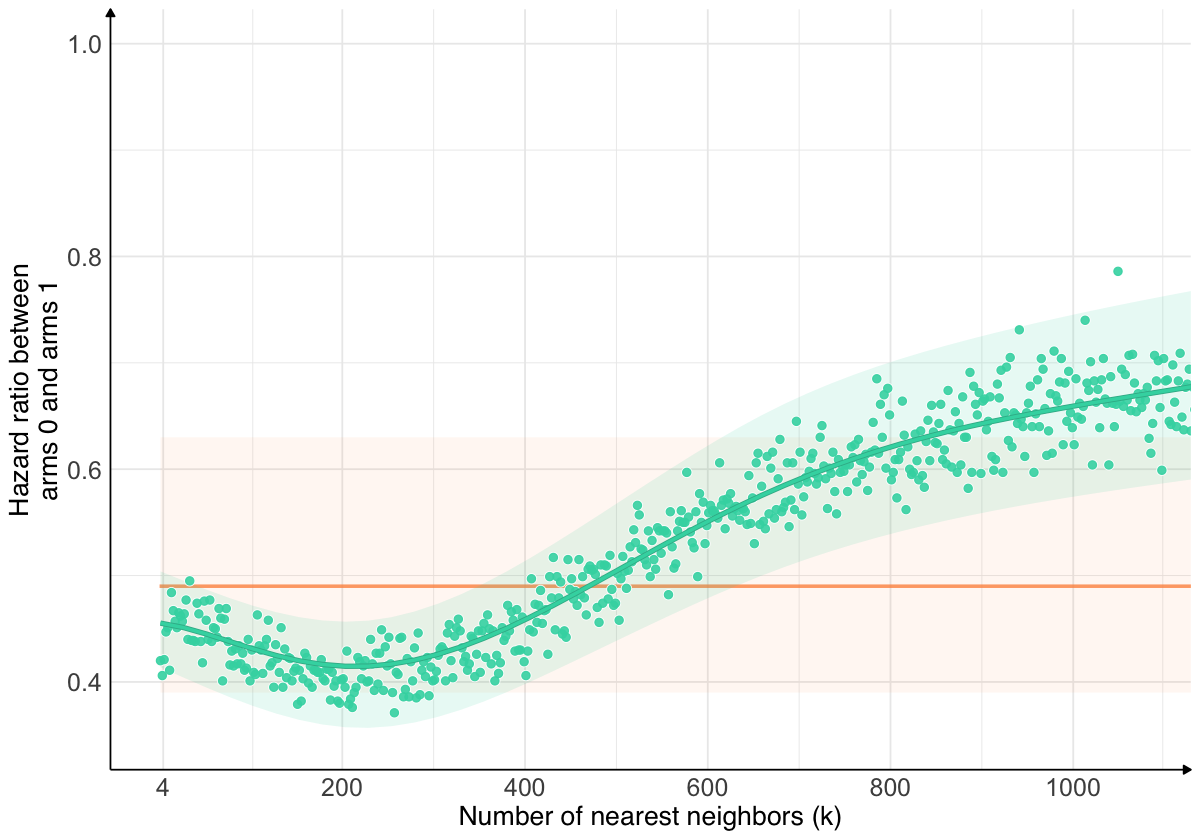

In [15]:
plotCc

## For different k: local cloaking computation

This section provides the computation of protection metrics (local cloaking).

We first compute metrics, which need the security metrics specifique function.
Then we display the distribution of the local cloaking for different k values.

### Violin plot 
We perform a violin plot for different k value with a log axis

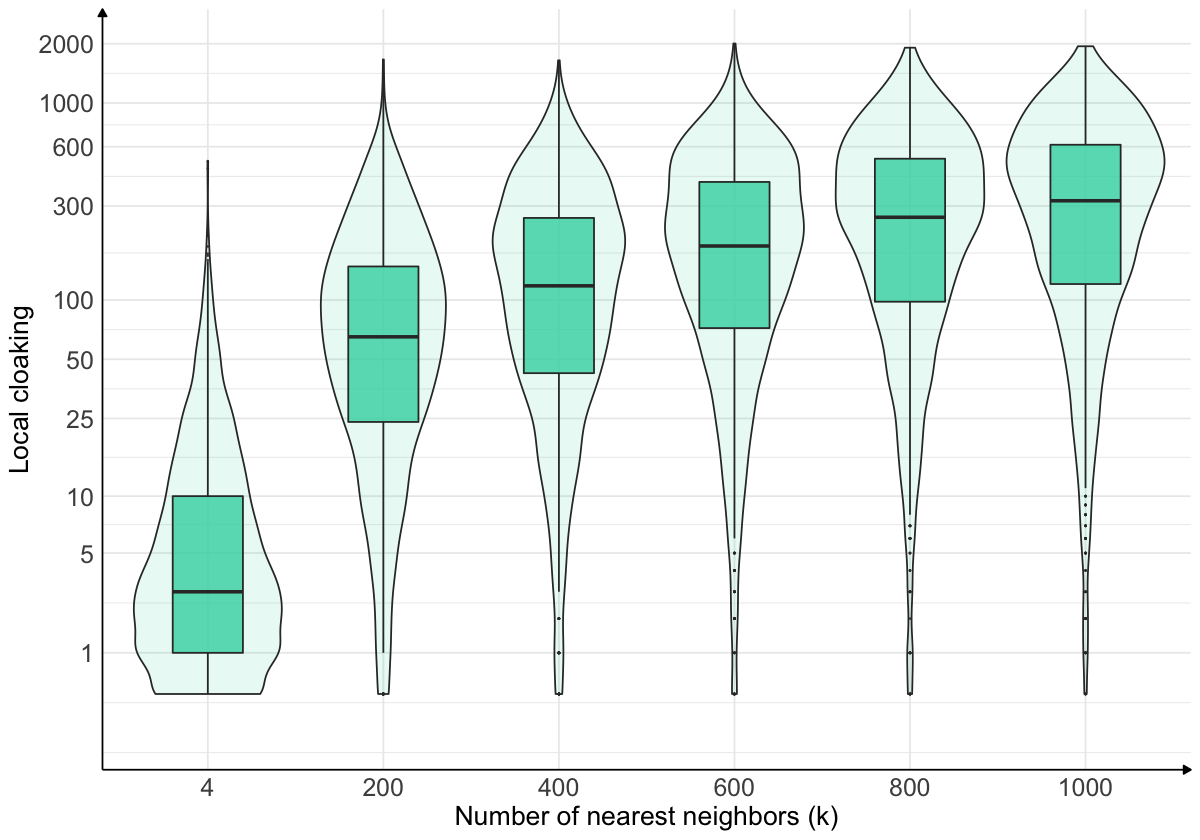

In [17]:
plotCe

# WBCD dataset: Impact of the *k* parameter

On this notebook, we present the R code to display the figure XXXXXX of the article [lien_papier].

We focused our analysis on the impact of the parameter *k* in the statistical structure and the security level of the dataset.

We performed two analyses:

    1- Figure of projection comparison. 
    2- Figure of AUC computation across k.
    2- Figure of distribution comparison accross k.

If you want to look at the code of evolution of AUROC according to *k* values, open the notebook `messageC_WBCD_python.ipynb`.

## Projection 

We performed 2 FAMD, small *k* value (i.e. 1/10% of the total number of individuals) and high *k* value (i.e. 40/50% of the total number of individuals).

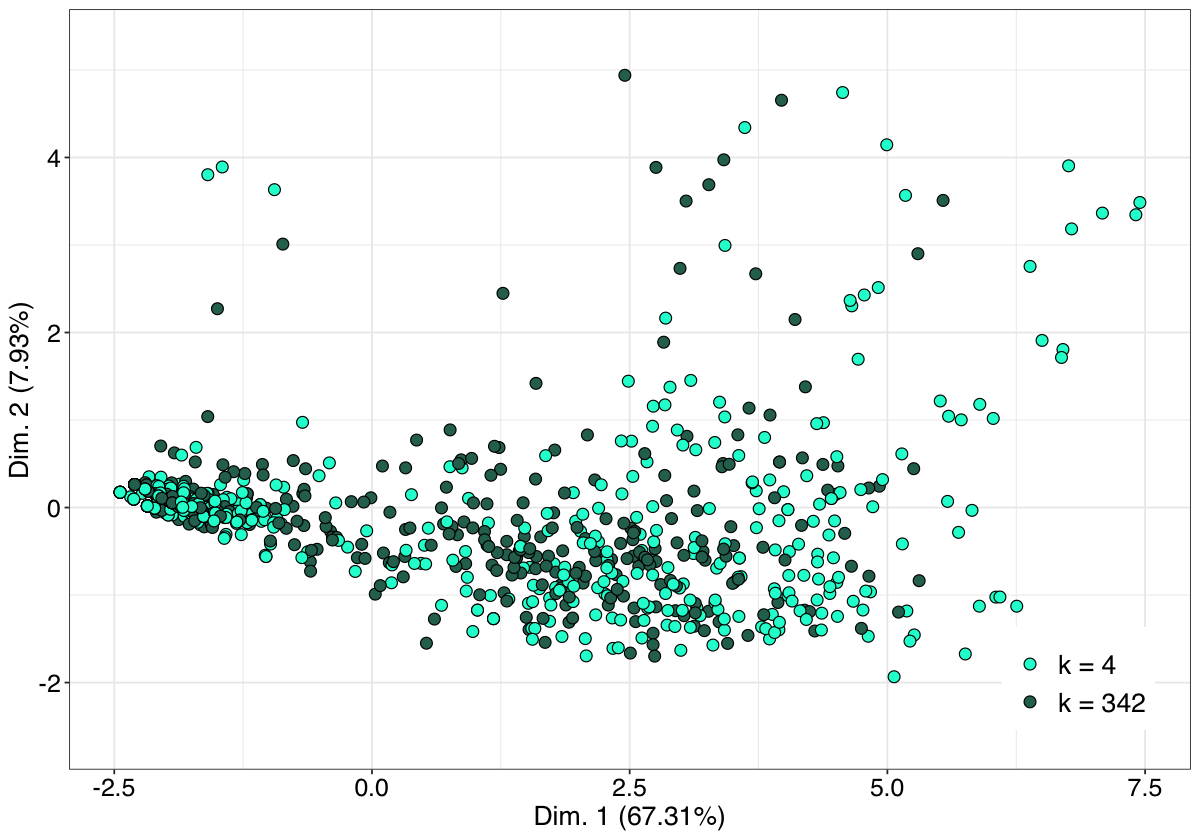

In [18]:
plotCb

## SVM computation

This section compares prediction performance using avatar and original data.

## Result visualization  

We are here visualize the Area under the ROC curve (AUC) according k value, and comparing the evolution of the curve between the original data and avatar data.

In [20]:
plotCd

ERROR: Error in eval(expr, envir, enclos): object 'plotCd' not found


## For different *k*: local cloaking computation

This section provides the computation of protection metrics (local cloaking).

We first computed metrics, which need the security metrics specifique function.
Then, we displayed the distribution of the local cloaking for different *k* values.

In [19]:
plotCf

ERROR: Error in eval(expr, envir, enclos): object 'plotCf' not found


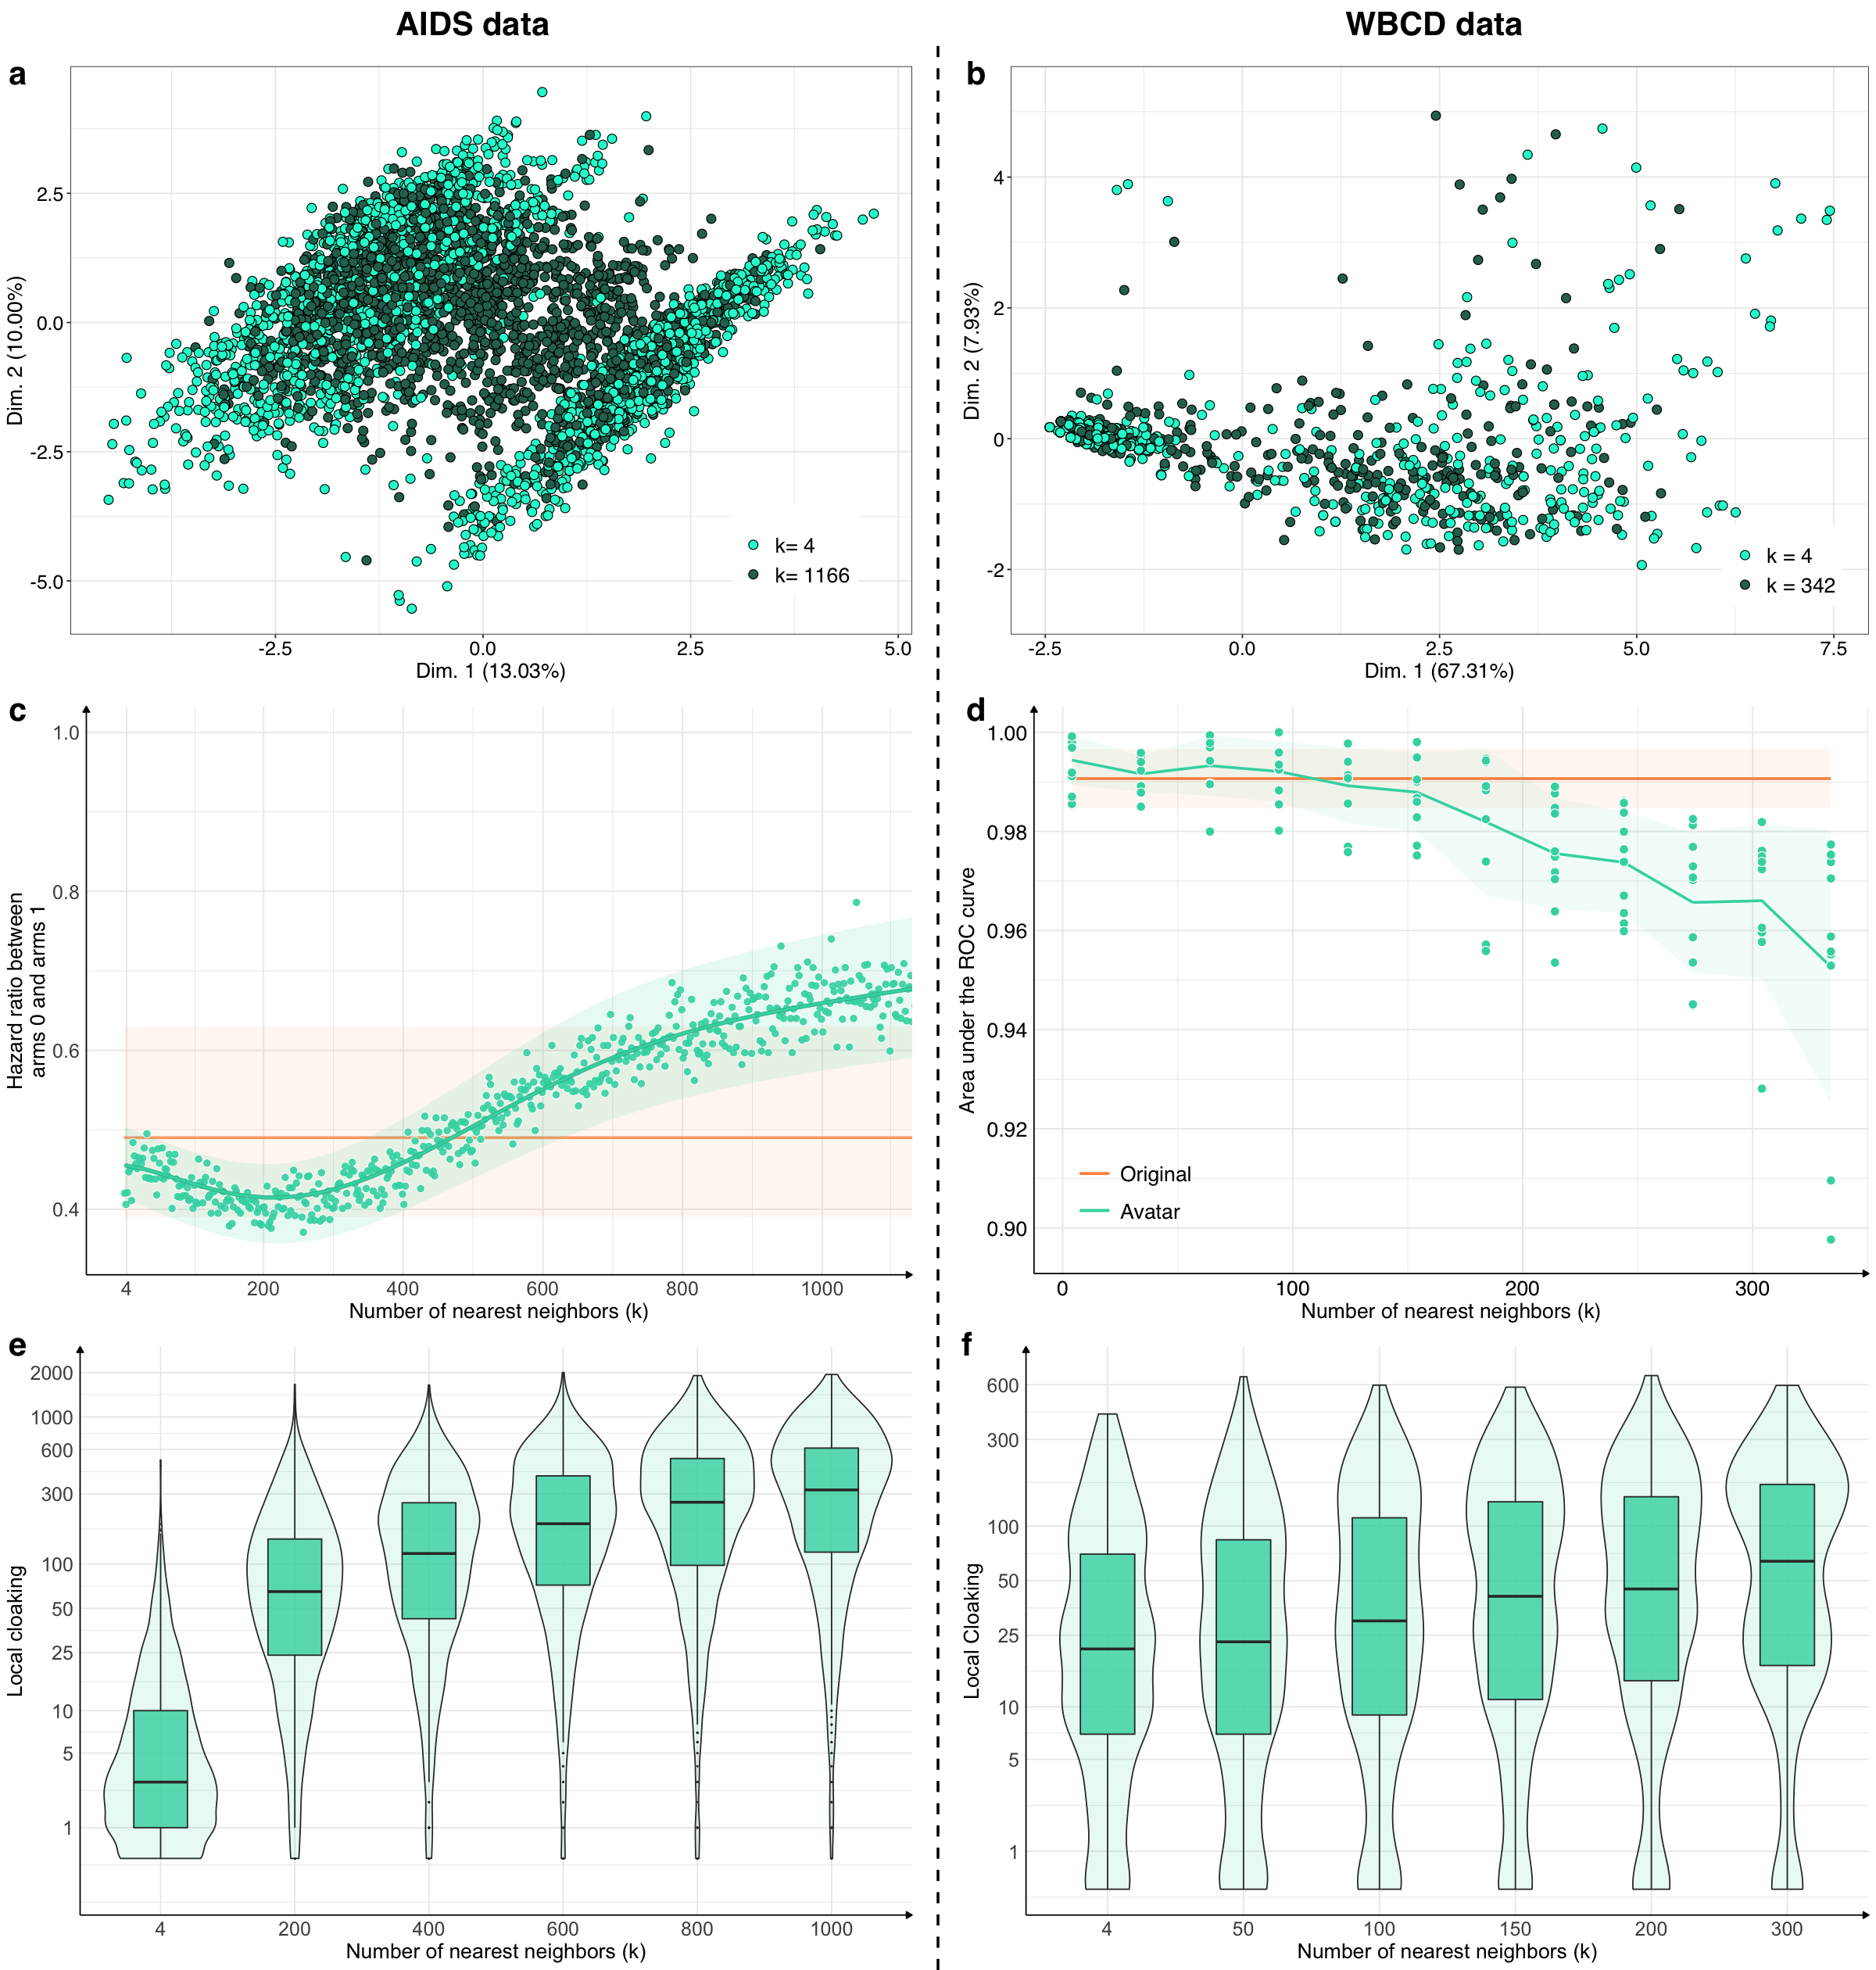

In [19]:
options(repr.plot.width = 20, repr.plot.height = 21)
panelC <- ggdraw() +
    draw_plot(plotCa, x = 0, y = 0.65, width = 0.49, height = 0.32) +
    draw_plot(plotCb, x = 0.51, y = 0.65, width = 0.49, height = 0.32) +
    draw_plot(plotCc, x = 0, y = 0.325, width = 0.49, height = 0.32) +
    draw_plot(plotCd, x = 0.51, y = 0.325, width = 0.49, height = 0.32) +
    draw_plot(plotCe, x = 0, y = 0, width = 0.49, height = 0.32) +
    draw_plot(plotCf, x = 0.51, y = 0, width = 0.49, height = 0.32) +
    draw_plot_label(label = c("a", "b", "c", "d", "e", "f", "AIDS data", "WBCD data"), size = 25, family = "sans",
                    x = c(0, 0.51, 0, 0.51, 0, 0.51, 0.17, 0.67), y = c(0.975, 0.975, 0.652, 0.652, 0.33, 0.33, 1, 1)) +
    draw_line(x = c(0.5, 0.5), y = c(0, 0.98), color = "black", size = 1, lty = 2)
panelC

#ggsave2(file="../../figure/panelC.svg", plot = ggplot2::last_plot(), width = 20, height = 21, dpi = 320)

In [20]:
t2 <- Sys.time()
t2-t1

Time difference of 25.00974 mins